# Economic Data Analysis and Forecasting

In [1]:

# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

# Load the data
df = pd.read_excel('./data/india-economy-data.xlsx')


## Data Cleaning and Validation

In [2]:

# Checking for missing values and filling them if necessary
print(df.isnull().sum())
df.fillna(method='ffill', inplace=True)

# Display basic statistics for the dataset
df.describe()


Year                       0
GDP                        0
FDI                        0
Unemployment Rate          0
Inflation                  0
Youth Unemployment Rate    0
GDP Growth rate            0
Life Expectancy            0
Birth Rate                 0
Death Rate                 0
Fertility Rate             0
dtype: int64


C:\Users\azamm\AppData\Local\Temp\ipykernel_8520\3502644290.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


,Year,GDP,FDI,Unemployment Rate,Inflation,Youth Unemployment Rate,GDP Growth rate,Life Expectancy,Birth Rate,Death Rate,Fertility Rate
count,32.000000,3.200000e+01,3.200000e+01,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,2006.500000,1.330218e+12,2.188073e+10,0.076579,0.071305,0.172262,5.994453,64.771312,23.493312,54.036156,2.936812
std,9.380832,9.888268e+11,1.983429e+10,0.008334,0.031240,0.045946,2.888827,3.745461,4.496744,18.593044,0.596684
min,1991.000000,2.701053e+11,7.353764e+07,0.048220,0.033282,0.117920,-5.831100,58.148000,17.163000,27.695000,2.159000
25%,1998.750000,4.494531e+11,3.341660e+09,0.071233,0.042845,0.132245,4.805700,61.774500,19.175000,37.311750,2.357250
50%,2006.500000,1.069578e+12,2.201240e+10,0.078550,0.064981,0.161140,6.727150,64.921000,23.536000,52.605500,2.899500
75%,2014.250000,2.055242e+12,4.050393e+10,0.082363,0.096137,0.210083,7.877150,68.145000,27.217500,69.552750,3.431250
max,2022.000000,3.416646e+12,6.436236e+10,0.087000,0.138702,0.259390,9.050300,70.190000,31.220000,86.564000,4.006000


## Correlation Analysis

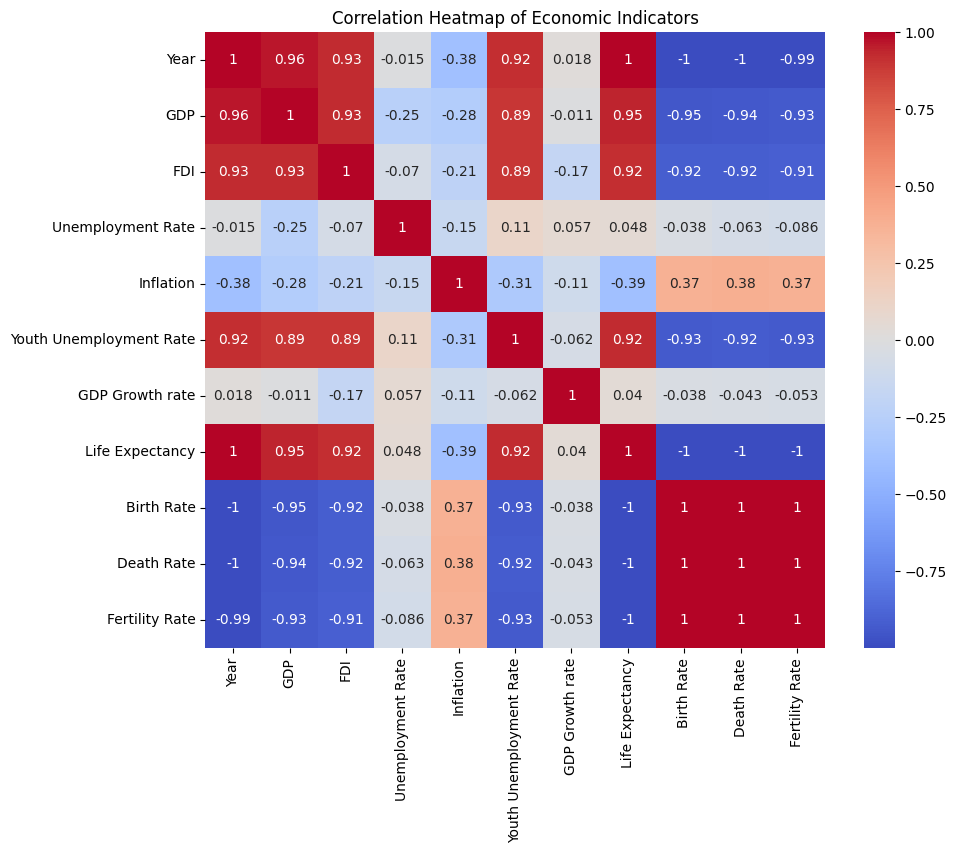

In [13]:

# Correlation Heatmap to understand relationships between variables
plt.figure(figsize=(10, 8))
corr = df.corr(method='pearson')
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Economic Indicators')
plt.show()

## Time Series Decomposition (GDP)

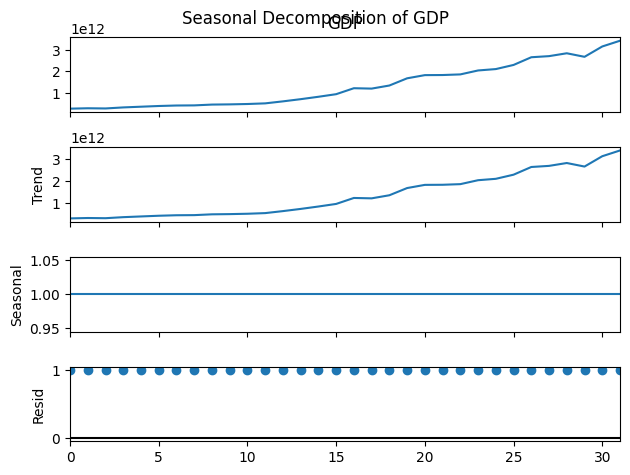

In [4]:

# Time Series Decomposition (Example with GDP)
result = seasonal_decompose(df['GDP'], model='multiplicative', period=1)
result.plot()
plt.suptitle('Seasonal Decomposition of GDP')
plt.show()

## Forecasting (GDP with ARIMA)

d:\Google Data Analytics Project\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


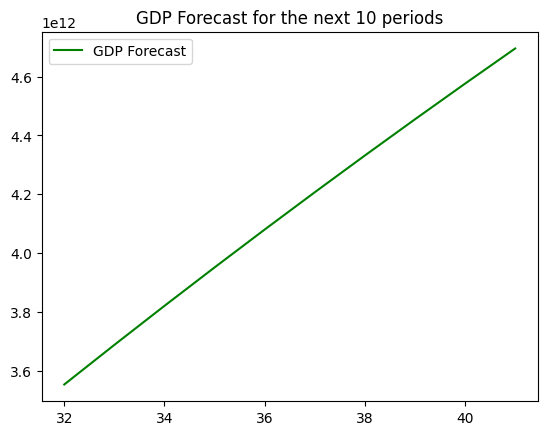

In [5]:

# Forecasting (Example with GDP using ARIMA model)
model = ARIMA(df['GDP'], order=(1, 1, 1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=10)
plt.plot(forecast, label='GDP Forecast', color='green')
plt.title('GDP Forecast for the next 10 periods')
plt.legend()
plt.show()

## Data Visualization

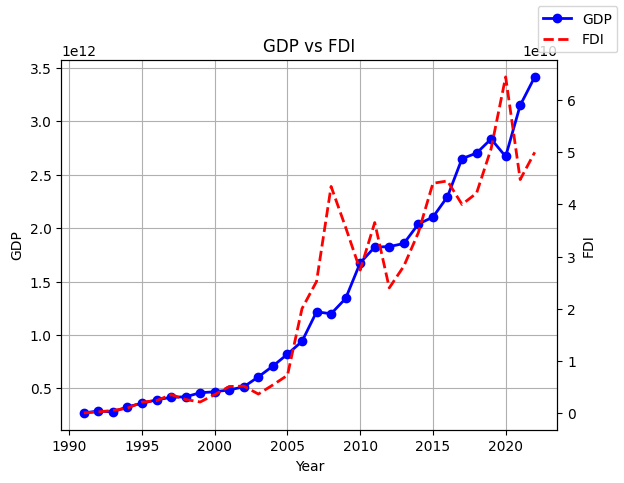

In [6]:

# Plot: GDP vs FDI
fig, ax = plt.subplots()
ax.plot(df['Year'], df['GDP'], label='GDP', color='blue', linewidth=2, marker='o')
ax.set_xlabel('Year')
ax.set_ylabel('GDP')
ax.set_title('GDP vs FDI')
ax2 = ax.twinx()
ax2.plot(df['Year'], df['FDI'], label='FDI', color='red', linewidth=2, linestyle='--')
ax2.set_ylabel('FDI')
fig.legend()
ax.grid(True)
plt.show()

## Unemployment Rate vs Youth Unemployment Rate

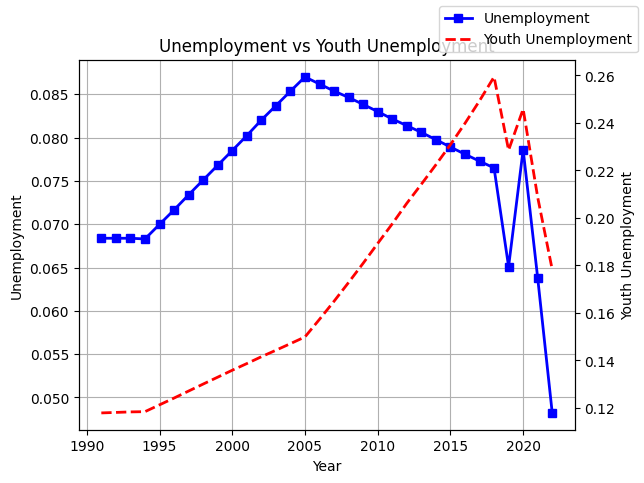

In [7]:

# Plot: Unemployment vs Youth Unemployment
fig, ax = plt.subplots()
ax.plot(df['Year'], df['Unemployment Rate'], label='Unemployment', color='blue', linewidth=2, marker='s')
ax.set_xlabel('Year')
ax.set_ylabel('Unemployment')
ax.set_title('Unemployment vs Youth Unemployment')
ax2 = ax.twinx()
ax2.plot(df['Year'], df['Youth Unemployment Rate'], label='Youth Unemployment', color='red', linewidth=2, linestyle='--')
ax2.set_ylabel('Youth Unemployment')
fig.legend()
ax.grid(True)
plt.show()

## Inflation vs GDP Growth Rate

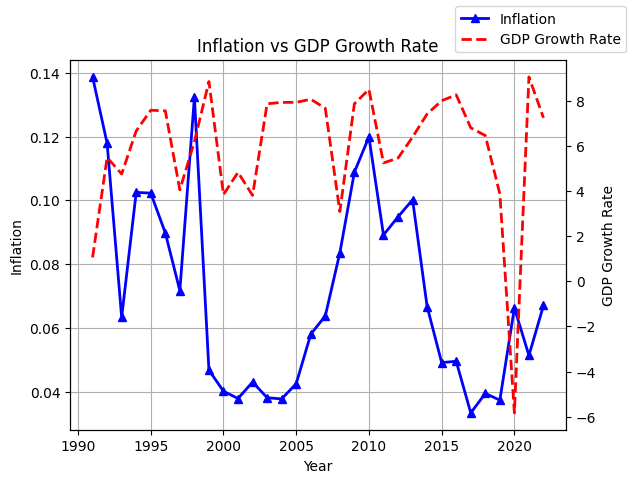

In [8]:

# Plot: Inflation vs GDP Growth Rate
fig, ax = plt.subplots()
ax.plot(df['Year'], df['Inflation'], label='Inflation', color='blue', linewidth=2, marker='^')
ax.set_xlabel('Year')
ax.set_ylabel('Inflation')
ax.set_title('Inflation vs GDP Growth Rate')
ax2 = ax.twinx()
ax2.plot(df['Year'], df['GDP Growth rate'], label='GDP Growth Rate', color='red', linewidth=2, linestyle='--')
ax2.set_ylabel('GDP Growth Rate')
fig.legend()
ax.grid(True)
plt.show()

## Life Expectancy vs GDP

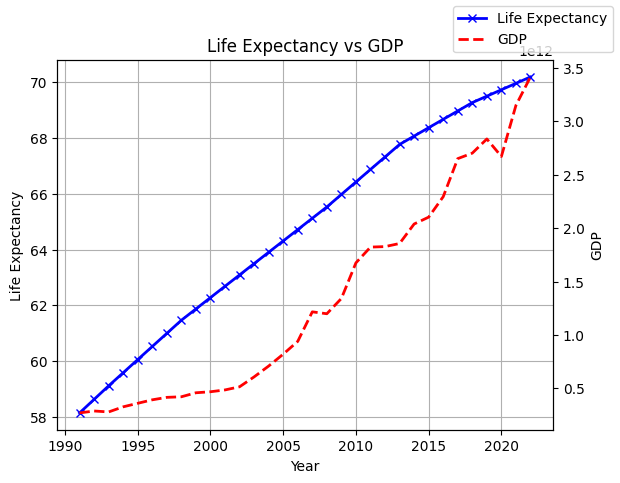

In [9]:

# Plot: Life Expectancy vs GDP
fig, ax = plt.subplots()
ax.plot(df['Year'], df['Life Expectancy'], label='Life Expectancy', color='blue', linewidth=2, marker='x')
ax.set_xlabel('Year')
ax.set_ylabel('Life Expectancy')
ax.set_title('Life Expectancy vs GDP')
ax2 = ax.twinx()
ax2.plot(df['Year'], df['GDP'], label='GDP', color='red', linewidth=2, linestyle='--')
ax2.set_ylabel('GDP')
fig.legend()
ax.grid(True)
plt.show()

## Life Expectancy vs Fertility Rate

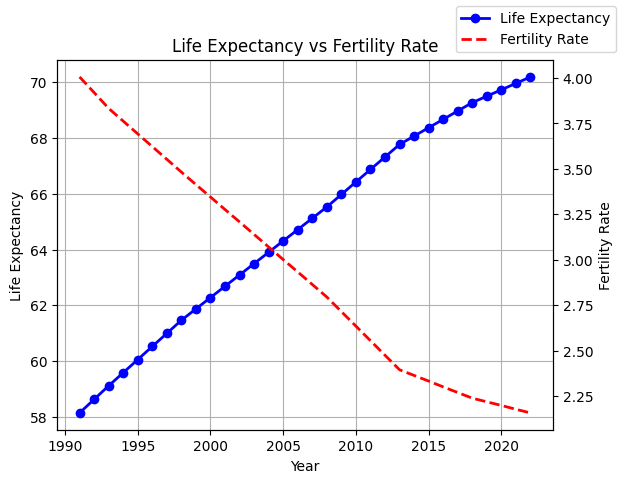

In [10]:

# Plot: Life Expectancy vs Fertility Rate
fig, ax = plt.subplots()
ax.plot(df['Year'], df['Life Expectancy'], label='Life Expectancy', color='blue', linewidth=2, marker='o')
ax.set_xlabel('Year')
ax.set_ylabel('Life Expectancy')
ax.set_title('Life Expectancy vs Fertility Rate')
ax2 = ax.twinx()
ax2.plot(df['Year'], df['Fertility Rate'], label='Fertility Rate', color='red', linewidth=2, linestyle='--')
ax2.set_ylabel('Fertility Rate')
fig.legend()
ax.grid(True)
plt.show()

## Birth Rate, Death Rate and Fertility Rate

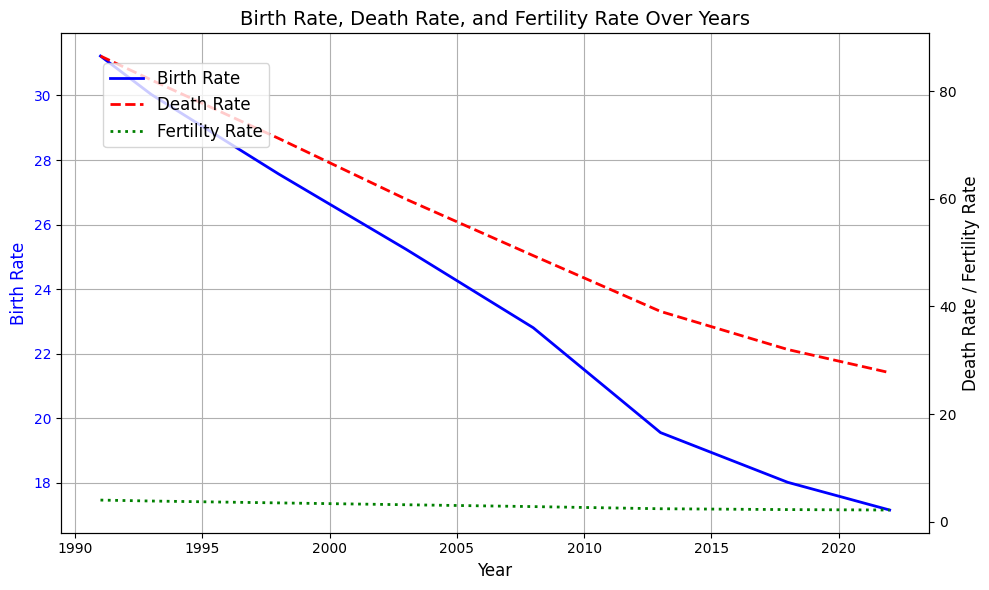

In [11]:

# Plot: Birth Rate, Death Rate, and Fertility Rate
fig, ax1 = plt.subplots(figsize=(10,6))

# Plotting Birth Rate on the primary y-axis
ax1.plot(df['Year'], df['Birth Rate'], label='Birth Rate', color='blue', linewidth=2)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Birth Rate', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

# Creating a secondary y-axis for Death Rate and Fertility Rate
ax2 = ax1.twinx()

# Plotting Death Rate and Fertility Rate
ax2.plot(df['Year'], df['Death Rate'], label='Death Rate', color='red', linestyle='--', linewidth=2)
ax2.plot(df['Year'], df['Fertility Rate'], label='Fertility Rate', color='green', linestyle=':', linewidth=2)
ax2.set_ylabel('Death Rate / Fertility Rate', fontsize=12)
ax2.tick_params(axis='y')

# Adding the title and legend
plt.title('Birth Rate, Death Rate, and Fertility Rate Over Years', fontsize=14)
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9), fontsize=12)

# Adjusting layout for better spacing
fig.tight_layout()

plt.show()

## Unemployment Rate vs GDP Growth Rate

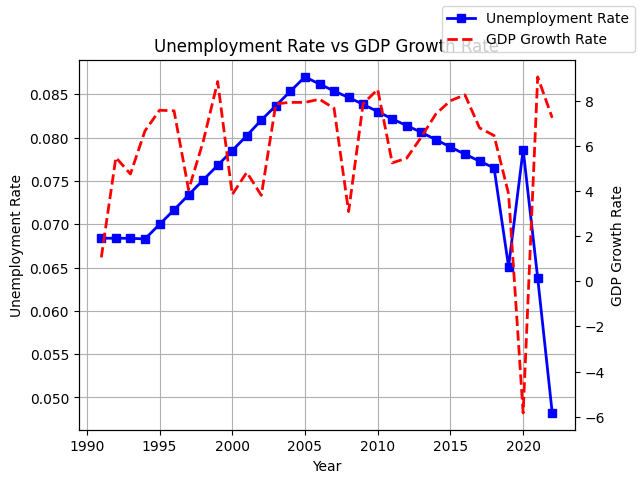

In [12]:

# Plot: Unemployment Rate vs GDP Growth Rate
fig, ax = plt.subplots()
ax.plot(df['Year'], df['Unemployment Rate'], label='Unemployment Rate', color='blue', linewidth=2, marker='s')
ax.set_xlabel('Year')
ax.set_ylabel('Unemployment Rate')
ax.set_title('Unemployment Rate vs GDP Growth Rate')
ax2 = ax.twinx()
ax2.plot(df['Year'], df['GDP Growth rate'], label='GDP Growth Rate', color='red', linewidth=2, linestyle='--')
ax2.set_ylabel('GDP Growth Rate')
fig.legend()
ax.grid(True)
plt.show()